# Manually clean segments

This notebook runs MNE visualization to select the segments where data is considered to be clean from the _pre Resting State_ (`preRS`) trials.
The selected times are saved to a `json` file for later processing.

## Notes
- Run each cell independently, not the complete notebook.

## Import libraries

In [1]:
# Default libraries
import os
import mne
import numpy as np
import pyxdf
import matplotlib.pyplot as plt
%matplotlib qt

# Custom libraries
from Functions import data_tools

## Import resting state data

In [38]:
# Settings
subject_id = "12"   # Subject number 

# Check for XDF files in folder
folder = fr"Data\sub-P{subject_id}_p300\ses-preRS_p300\eeg"
xdf_file = [file for file in os.listdir(folder) if file.endswith(".xdf")][0]

# Import EEG data from file
raw = data_tools.xdf_to_raw(fr"{folder}\\{xdf_file}")

Creating RawArray with float64 data, n_channels=24, n_times=68858
    Range : 0 ... 68857 =      0.000 ...   229.523 secs
Ready.


## Visualize raw data

Visualize raw data and take note of the start time of a clean `5-sec` segment in the data.

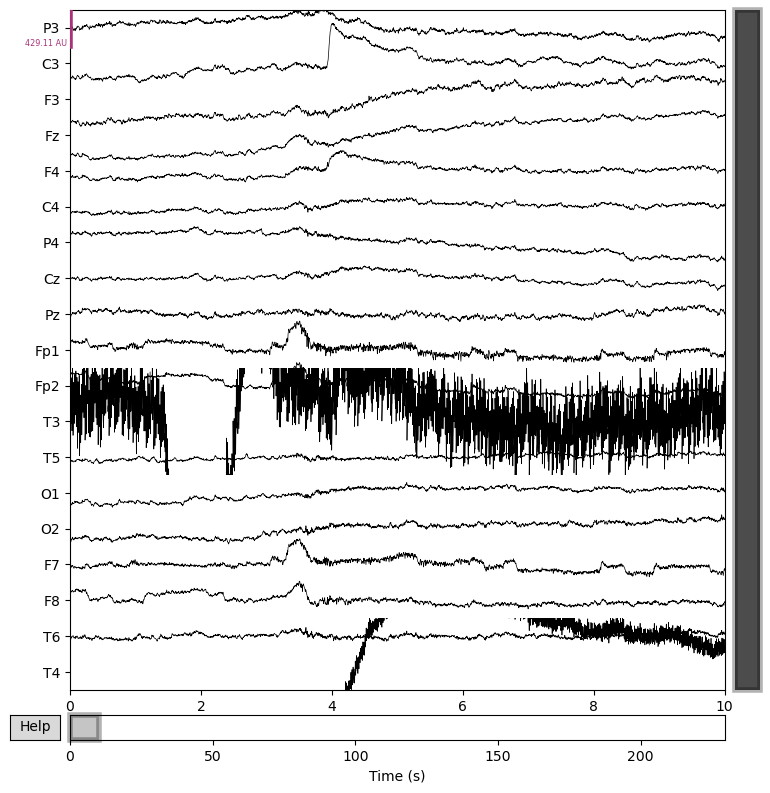

Channels marked as bad:
['F8', 'F7']
Channels marked as bad:
['F7', 'F8']


In [39]:
raw.plot(title=f"Subject {subject_id}")

## Export to JSON   

Export file information to JSON file for later reference

In [40]:
# Settings
save_file = True   # Boolean to save data to JSON file
rs_start = 38        # Time at which clean resting state starts [sec]
rs_duration = 5     # Duration of clean resting state window [sec]
# Write list of channels to exclude. Leave empty if none
ch_to_exclude = ["T3", "T4"]  

if save_file:
    info_to_save = {
        "rs_start":rs_start,
        "rs_duration":rs_duration,
        "ch_to_exclude":ch_to_exclude
    }

    for key, value in info_to_save.items():
        data_tools.append_json(
            filename = r"Data\clean_segments.json",
            subject = f"subject {subject_id}",
            key = key,
            value = value
            )